In [26]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
%matplotlib inline

import string
import seaborn as sns

#import lightgbm as lgb
#import xgboost as xgb
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [27]:
data_in=pd.read_csv('data/fj1.csv', dtype={"resolution": str, "gsubname2":str, "gname3":str, "gsubname3":str, "claimmode3_txt":str, "weaptype4_txt":str, "weapsubtype4_txt":str, "divert":str, "kidhijcountry":str})

In [28]:
data_in['nkill-nkillter'] = data_in['nkill'] - data_in['nkillter']
data_in = data_in.fillna('-1')
#data_in['nkill-nkillter'].apply(int)

In [29]:
data_in = data_in[data_in.doubtterr == 1]

one_hot_feature = ['attacktype1', 'targtype1','nkill-nkillter', 'propextent', 'region', 'weaptype1', 'suicide', 'ransom', 'nperps', 'crit1', 'crit2', 'crit3']
data = data_in[one_hot_feature]

data['iyear'] = data_in['iyear']
data['gname'] = data_in['gname']
data['eventid'] = data_in['eventid']

data=data.fillna('-1')

del data_in

#LabelEncoder将各种标签分配一个可数的连续编号
for feature in one_hot_feature:
    try:
        data[feature] = LabelEncoder().fit_transform(data[feature].apply(int))
    except:
        data[feature] = LabelEncoder().fit_transform(data[feature]) 

C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [30]:
#选取训练集
train = data[data.iyear < 2015]
new = data[data.iyear >= 2015]
new = new[new.gname != 'Unknown']
train = pd.concat([train,new])

#选取测试集
test = data[data.gname == 'Unknown']
test = test[test.iyear >= 2015]

In [6]:
train

,attacktype1,targtype1,nkill-nkillter,propextent,region,weaptype1,suicide,ransom,nperps,crit1,crit2,crit3,iyear,gname,eventid
0,1,3,5,0,10,2,0,1,47,1,1,1,1998,Hutu extremists,199801010001
11,6,3,1,0,10,2,0,1,1,1,1,0,1998,Hutu extremists,199801060001
22,1,13,3,0,9,2,0,1,1,1,1,1,1998,Unknown,199801100003
32,1,13,3,0,9,6,0,1,1,1,1,1,1998,Unknown,199801130002
37,1,3,13,0,10,2,0,1,1,1,1,1,1998,Unknown,199801170001
49,2,0,1,0,9,3,0,1,1,1,1,1,1998,Unknown,199801200004
65,2,0,4,2,9,3,0,1,1,1,1,1,1998,Unknown,199801250003
72,6,9,1,2,0,5,0,1,0,0,1,1,1998,Unknown,199801260002
74,1,3,8,0,5,2,0,1,1,1,1,0,1998,Liberation Tigers of Tamil Eelam (LTTE),199801280001
78,1,3,1,0,5,2,0,1,1,1,1,0,1998,Liberation Tigers of Tamil Eelam (LTTE),199801280005


In [7]:
test

,attacktype1,targtype1,nkill-nkillter,propextent,region,weaptype1,suicide,ransom,nperps,crit1,crit2,crit3,iyear,gname,eventid
74742,1,13,2,2,5,2,0,1,4,0,1,1,2015,Unknown,201501010013
74768,8,3,0,3,9,10,0,1,0,1,1,0,2015,Unknown,201501010074
74787,1,1,1,0,5,2,0,1,0,0,1,1,2015,Unknown,201501020049
74793,1,3,1,0,5,2,0,1,0,1,1,0,2015,Unknown,201501020058
74807,2,3,1,0,5,3,0,1,0,1,1,0,2015,Unknown,201501020081
74815,0,3,1,2,9,3,0,1,0,1,1,0,2015,Unknown,201501030039
74829,2,3,1,3,5,3,0,1,0,1,1,0,2015,Unknown,201501030059
74832,2,1,6,0,9,3,0,1,0,1,0,1,2015,Unknown,201501030073
74849,1,3,2,0,5,2,0,1,0,1,1,0,2015,Unknown,201501030092
74892,5,7,0,0,9,10,0,2,0,0,1,1,2015,Unknown,201501040043


In [8]:
train.to_csv('data/21train.csv', index=False)
test.to_csv('data/21test.csv', index=False)

In [31]:
res = ['iyear', 'gname']
train_X = train.drop(res , axis=1)
train_y = train['gname']
test_X = test.drop(res , axis=1)

SVM_单轮

In [10]:
#all_feature = ['attacktype1', 'targtype1','nkill-nkillter', 'propextent', 'region', 'weaptype1', 'suicide', 'ransom', 'nperps', 'crit1', 'crit2', 'crit3', 'iyear', 'gname']

from sklearn.svm import SVC, LinearSVC

svc = SVC()

svc.fit(train_X, train_y)

test_y = svc.predict(test_X)

svc.score(train_X, train_y)

0.9024747043764476

In [11]:
submission = pd.DataFrame({
        "eventid": test['eventid'],
        "gname": test_y
    })
submission.to_csv('data/21out.csv', index=False)

SVM_十折交叉验证

In [37]:
from sklearn.svm import SVC #Support Vector Classifier
import matplotlib.pyplot as plt #可视化模块
import numpy as np

X = train_X
y = train_y

In [40]:
from sklearn.cross_validation import cross_val_score # K折交叉验证模块

#使用K折交叉验证模块
scores = cross_val_score(SVC(), X, y, cv=10, scoring='accuracy')

#将10次的预测准确率打印出
print(scores)

#将10次的预测准确平均率打印出
print(scores.mean())

[0.89084646 0.93879164 0.96157518 0.96518564 0.96652147 0.97992376
 0.98501292 0.98863488 0.98801054 0.98711819]
0.9651620677690942


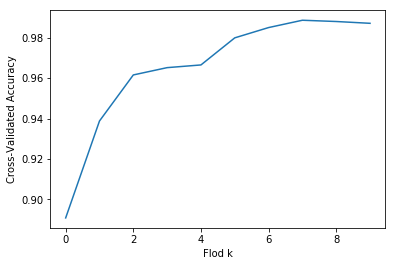

In [41]:
#可视化数据
k_range = range(0, 10)
plt.plot(k_range, scores)
plt.xlabel('Flod k')
plt.ylabel('Cross-Validated Accuracy')
plt.show()